# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from main import PromptToQueryResult
from services import Service

In [ ]:
await GenerateQuestions()

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-06-23.txt", selectedService=Service.HuggingFace, debug=False)

Claude API Request: [{'role': 'user', 'content': "We implemented a sql and python code generator based on database schema and user prompt. \nA large language model deployed and we embed user's prompt into a template and genarate sql and python code based on the data schema provided below, \nbut users can not write good prompts so we need to rephrase and guess their intents and rewrite their prompts in a better way.  \n\nData Schema:\nTable: brands\nbrand_id: INTEGER - Unique identifier for each brand.\nbrand_name: VARCHAR - Name of the brand.\nSample Data for brands\nbrand_id\tbrand_name\n1\tElectra\n2\tHaro\nThis table stores information about different brands. Each brand has a unique identifier (brand_id) and a name (brand_name).\n\nTable: categories\ncategory_id: INTEGER - Unique identifier for each category.\ncategory_name: VARCHAR - Name of the category.\nSample Data for categories\ncategory_id\tcategory_name\n1\tChildren Bicycles\n2\tComfort Bicycles\nThis table stores informatio

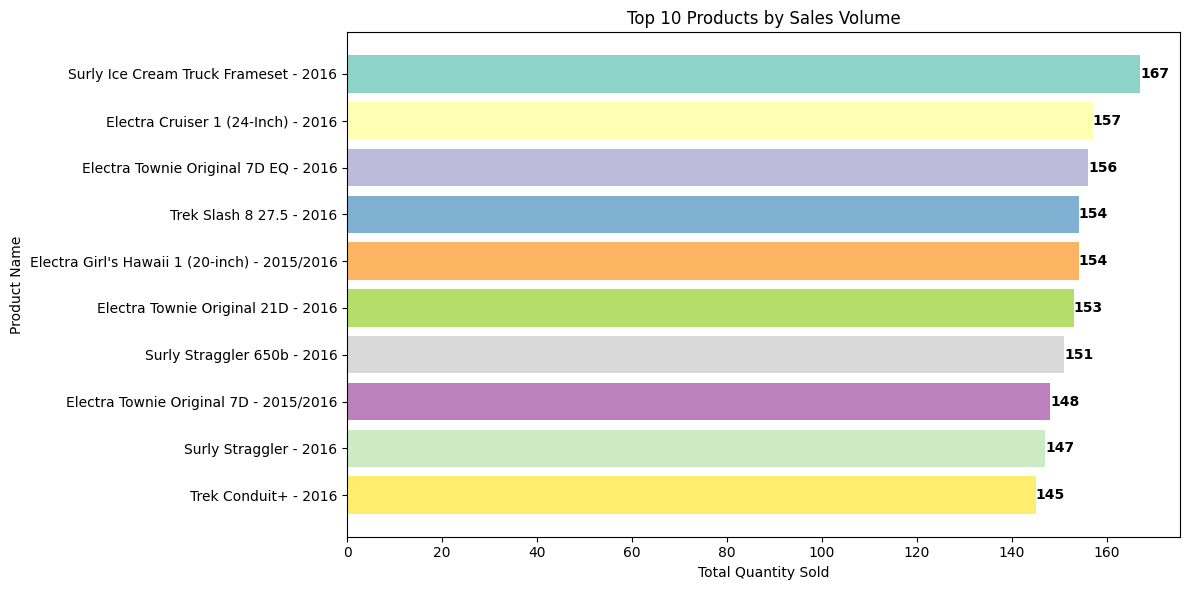

,product_name,total_quantity
0,Surly Ice Cream Truck Frameset - 2016,167
1,Electra Cruiser 1 (24-Inch) - 2016,157
2,Electra Townie Original 7D EQ - 2016,156
3,Trek Slash 8 27.5 - 2016,154
4,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154
5,Electra Townie Original 21D - 2016,153
6,Surly Straggler 650b - 2016,151
7,Electra Townie Original 7D - 2015/2016,148
8,Surly Straggler - 2016,147
9,Trek Conduit+ - 2016,145


In [15]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.ClaudeAI, huggingface_model="Llama318BInstruct", model_mode="chat")


result String: ```sql
<sql>
SELECT p.product_name, SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC
LIMIT 10;
</sql>
<python>
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the result of the SQL query
product_names = df['product_name']
total_quantities = df['total_quantity_sold']

plt.figure(figsize=(10, 6))
plt.bar(product_names, total_quantities, color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top-Selling Products by Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
</python>
```
User query: most sold products by quantity all over time
Rephrased prompt: Identify the top-selling products based on total quantity sold over time. Consider creating a bar chart to visualize the products with the highest sales volume.#
SQL:  
SELECT p.product_name, SUM(oi.quantity) AS total_qu

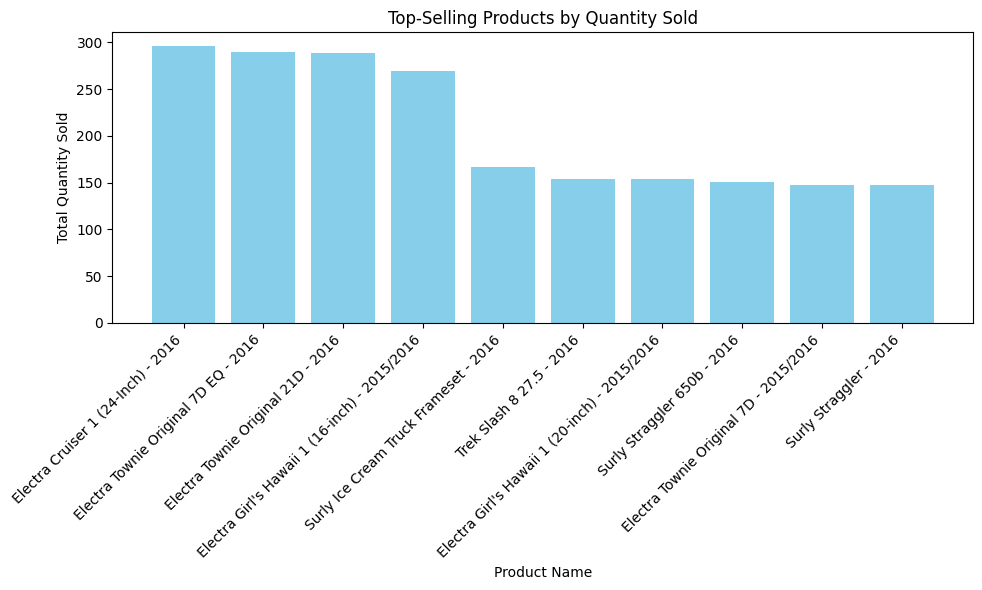

,product_name,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296
1,Electra Townie Original 7D EQ - 2016,290
2,Electra Townie Original 21D - 2016,289
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269
4,Surly Ice Cream Truck Frameset - 2016,167
5,Trek Slash 8 27.5 - 2016,154
6,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154
7,Surly Straggler 650b - 2016,151
8,Electra Townie Original 7D - 2015/2016,148
9,Surly Straggler - 2016,147


In [11]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.AzureOpenAI, huggingface_model="Llama318BInstruct", model_mode="chat")

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, huggingface_model="Llama318BInstruct", model_mode="chat")